In [1]:
import os
import re
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission,
    obs_map_reverser
)

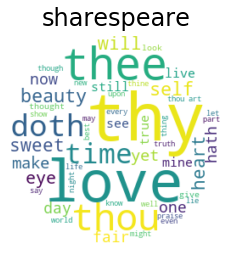

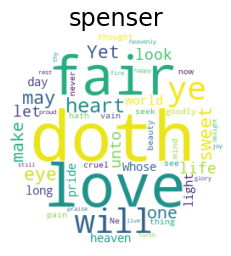

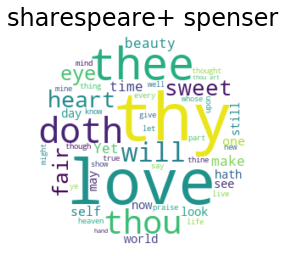

In [6]:
text1 = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
text2 = open(os.path.join(os.getcwd(), 'data/spenser.txt')).read()
text = text1 + text2
wordcloud1 = text_to_wordcloud(text1, title='sharespeare')
wordcloud2 = text_to_wordcloud(text2, title='spenser')
wordcloud = text_to_wordcloud(text, title='sharespeare+ spenser')

syllable = open(os.path.join(os.getcwd(), 'data/Syllable_dictionary.txt')).read()

text = text.replace('(', '')
text = text.replace(')', '')
text = text.replace(',', '')
text = text.replace(':', '')
text = text.replace(';', '')
text = text.replace('.', '')
text = text.replace('?', '')

# text = text.replace('-', ' ')
text = text.replace(" 'T", ' T')
text = text.replace("s' ", 's ')
text = text.replace("'\n", "\n")
text = text.replace("\n'", "\n")

text = text.lower()

In [7]:
def parse_syllable(syllable):
    lines = [line.split() for line in syllable.split('\n') if line.split()]
    
    syllable_map = {}
    for line in lines:
        try:
            syllable_map[line[0]] = int(line[1])
        except:
            syllable_map[line[0]] = int(line[2])
    return syllable_map
        
        
        
def parse_per_line(text, syll_map=None):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]
    valid_lines = []
    for line in lines:
        if len(line) > 5:
            valid_lines.append(line)
    lines = valid_lines

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []
        
        for word in line:
#             word = re.sub(r'[^\w]', '', word).lower()

            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1
            
            # Add the encoded word.
            if syll_map==None:
                obs_elem.append(obs_map[word])
            else:
                try:
                    obs_elem.append((obs_map[word], syll_map[word]))
                except:
                    obs_elem.append((obs_map[word], 1))
        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [8]:
syll_map = parse_syllable(syllable)
obs, obs_map = parse_per_line(text)



In [10]:
hmm8 = unsupervised_HMM(obs, 8, 100)

iter: 0
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
iter: 9
iter: 10
iter: 11
iter: 12
iter: 13
iter: 14
iter: 15
iter: 16
iter: 17
iter: 18
iter: 19
iter: 20
iter: 21
iter: 22
iter: 23
iter: 24
iter: 25
iter: 26
iter: 27
iter: 28
iter: 29
iter: 30
iter: 31
iter: 32
iter: 33
iter: 34
iter: 35
iter: 36
iter: 37
iter: 38
iter: 39
iter: 40
iter: 41
iter: 42
iter: 43
iter: 44
iter: 45
iter: 46
iter: 47
iter: 48
iter: 49
iter: 50
iter: 51
iter: 52
iter: 53
iter: 54
iter: 55
iter: 56
iter: 57
iter: 58
iter: 59
iter: 60
iter: 61
iter: 62
iter: 63
iter: 64
iter: 65
iter: 66
iter: 67
iter: 68
iter: 69
iter: 70
iter: 71
iter: 72
iter: 73
iter: 74
iter: 75
iter: 76
iter: 77
iter: 78
iter: 79
iter: 80
iter: 81
iter: 82
iter: 83
iter: 84
iter: 85
iter: 86
iter: 87
iter: 88
iter: 89
iter: 90
iter: 91
iter: 92
iter: 93
iter: 94
iter: 95
iter: 96
iter: 97
iter: 98
iter: 99


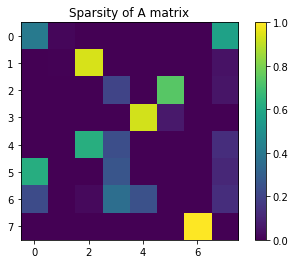

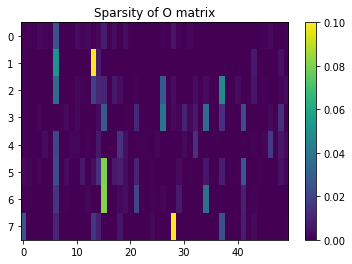

In [11]:
visualize_sparsities(hmm8, O_max_cols=50)


In [12]:
# naive poem generation 
def sample_sonnet(hmm, obs_map, n_words=100):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    sonnet = ""
    for i in range(14):
        emission, states = hmm.generate_emission(n_words)
        sentence = [obs_map_r[i] for i in emission]
        sonnet = sonnet + ' '.join(sentence).capitalize() + '\n'

    return sonnet

In [13]:
print('Sample Sonnet:\n====================')
print(sample_sonnet(hmm8, obs_map, n_words=7))

Sample Sonnet:
Arrive bring cordials should thou fair the
So to my fair thou born wide
Advance power outwent thy which may the
Now merchants not in truth spite death
Remain goodly last better thoughts on of
Scarlet through by men's fair dulling my
Portliness go cold may rhymes sad cruelty
Though all still therefore straight come remain
Not doth i for dispense weary heart
Injuries at me golden eclipses to both
Rage wont as increase gifts by first
Thee in dress shape skill by the
Trade did the time's bands then lack
Plaints to age's power power due easy



In [16]:
hmm4 = unsupervised_HMM(obs, 4, 100)

iter: 0
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
iter: 9
iter: 10
iter: 11
iter: 12
iter: 13
iter: 14
iter: 15
iter: 16
iter: 17
iter: 18
iter: 19
iter: 20
iter: 21
iter: 22
iter: 23
iter: 24
iter: 25
iter: 26
iter: 27
iter: 28
iter: 29
iter: 30
iter: 31
iter: 32
iter: 33
iter: 34
iter: 35
iter: 36
iter: 37
iter: 38
iter: 39
iter: 40
iter: 41
iter: 42
iter: 43
iter: 44
iter: 45
iter: 46
iter: 47
iter: 48
iter: 49
iter: 50
iter: 51
iter: 52
iter: 53
iter: 54
iter: 55
iter: 56
iter: 57
iter: 58
iter: 59
iter: 60
iter: 61
iter: 62
iter: 63
iter: 64
iter: 65
iter: 66
iter: 67
iter: 68
iter: 69
iter: 70
iter: 71
iter: 72
iter: 73
iter: 74
iter: 75
iter: 76
iter: 77
iter: 78
iter: 79
iter: 80
iter: 81
iter: 82
iter: 83
iter: 84
iter: 85
iter: 86
iter: 87
iter: 88
iter: 89
iter: 90
iter: 91
iter: 92
iter: 93
iter: 94
iter: 95
iter: 96
iter: 97
iter: 98
iter: 99


In [17]:
print('Sample Sonnet:\n====================')
print(sample_sonnet(hmm4, obs_map, n_words=7))

Sample Sonnet:
Do a away on shall old that
He thou every turns recompense love ten
I poisoned sake and heart of my
With flower victor the lines thee perpetual
Made so should from happy thou you
Do thing lofty wonder pointing one it
Thy help to-day but i even to
And widowed hour knife the repair jade
I motion of being lines love must
Cause if that heavenly flower in his
Whilst away the your then thy needs
Profaned to help be spent please that
Sees the nature winters not if with
Thy ranks she him day new painter



In [18]:
hmm2 = unsupervised_HMM(obs, 2, 100)
hmm16 = unsupervised_HMM(obs, 16, 100)

iter: 0
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
iter: 9
iter: 10
iter: 11
iter: 12
iter: 13
iter: 14
iter: 15
iter: 16
iter: 17
iter: 18
iter: 19
iter: 20
iter: 21
iter: 22
iter: 23
iter: 24
iter: 25
iter: 26
iter: 27
iter: 28
iter: 29
iter: 30
iter: 31
iter: 32
iter: 33
iter: 34
iter: 35
iter: 36
iter: 37
iter: 38
iter: 39
iter: 40
iter: 41
iter: 42
iter: 43
iter: 44
iter: 45
iter: 46
iter: 47
iter: 48
iter: 49
iter: 50
iter: 51
iter: 52
iter: 53
iter: 54
iter: 55
iter: 56
iter: 57
iter: 58
iter: 59
iter: 60
iter: 61
iter: 62
iter: 63
iter: 64
iter: 65
iter: 66
iter: 67
iter: 68
iter: 69
iter: 70
iter: 71
iter: 72
iter: 73
iter: 74
iter: 75
iter: 76
iter: 77
iter: 78
iter: 79
iter: 80
iter: 81
iter: 82
iter: 83
iter: 84
iter: 85
iter: 86
iter: 87
iter: 88
iter: 89
iter: 90
iter: 91
iter: 92
iter: 93
iter: 94
iter: 95
iter: 96
iter: 97
iter: 98
iter: 99
iter: 0
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
iter: 9
iter: 10
iter: 11
iter: 12
ite

In [19]:
print('Sample Sonnet:\n====================')
print(sample_sonnet(hmm2, obs_map, n_words=7))
print('Sample Sonnet:\n====================')
print(sample_sonnet(hmm16, obs_map, n_words=7))

Sample Sonnet:
Heart do be vanished my mother fast
Forth that my anon being mine twice
Of make thereby wailing so grace well
So child excellent then blood how young
By desert as o'er make her from
Loved shall praised lets and for in
Of thee self race to to in
Dulness i desire exceeded renew debate in
Eyes for face summer's every thee whom
Slave too on above i prayers i
Reckon famoused their against thine loved throned
Good faith open thee a thee because
Thee and death was will to-morrow as
I smell me single to if the

Sample Sonnet:
Minds lily's his different rest dimmed will
Ornament in more and kind best thee
Am sides that in thy ornament as
Sheaves than be my sight cannot men
My merit winter thou from lives looks
The thought forgot is cry penance of
Beauty can gives nature's verse to wherein
Already yet what do is i to
Creation my hide this as face to
As lest are that with legions a
Nor mind far pointing sickly me an
I'll art reason blind and lead some
No eternal and blood tyrant ar

In [9]:
# generate extra data for LSTM
def sample_sonnet_data(hmm, obs_map, n_words=100, n_sonnet=1000):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    doc = ""
    for s in range(n_sonnet):
        doc = doc + str(s) + '\n'
        sonnet = ""
        for i in range(14):
            emission, states = hmm.generate_emission(n_words)
            sentence = [obs_map_r[i] for i in emission]
            sonnet = sonnet + ' '.join(sentence).capitalize() + '\n'
        doc = doc + sonnet + '\n\n'

    text_file = open('data/generated_sonnet_1000.txt', "w")
    text_file.write(doc)
    text_file.close()

    return

In [24]:
sample_sonnet_data(hmm16, obs_map, n_words=7, n_sonnet=1000)

In [35]:
# less naive poem generation 

def sample_line(obs_map_r,syll_map, emission):
    sentence = ""
    n_syllable = 0
    for j in range(20):
        word = obs_map_r[emission[j]]
        if word in syll_map and n_syllable <= 9:
            n_syllable = n_syllable + syll_map[word]
            if word == "i":
                word = "I"
            sentence = sentence + ' ' + word
        if n_syllable >= 10:
            return sentence
            
    return sentence

def sample_sonnet2(hmm, obs_map, syll_map, n_words=20):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    sonnet = ""
    for i in range(3):
        emission1,emission2, states = hmm.generate_emission2(n_words)
        emission3,emission4, states = hmm.generate_emission2(n_words)
        
        sentence_a = sample_line(obs_map_r,syll_map, emission1)
        sonnet = sonnet + sentence_a.capitalize() + '\n'
        
        sentence_b = sample_line(obs_map_r,syll_map, emission3)
        sonnet = sonnet + sentence_b.capitalize() + '\n'
        
        sentence_a = sample_line(obs_map_r,syll_map, emission2)
        sonnet = sonnet + sentence_a.capitalize() + '\n'
        
        sentence_b = sample_line(obs_map_r,syll_map, emission4)
        sonnet = sonnet + sentence_b.capitalize() + '\n'
        
    emission1,emission2, states = hmm.generate_emission2(n_words)
    sentence_a = sample_line(obs_map_r,syll_map, emission1)
    sonnet = sonnet + sentence_a.capitalize() + '\n'
    sentence_a = sample_line(obs_map_r,syll_map, emission2)
    sonnet = sonnet + sentence_a.capitalize() + '\n'
    
    return sonnet

In [49]:
print('Sample Sonnet:\n====================')
print(sample_sonnet2(hmm8, obs_map, syll_map))

Sample Sonnet:
 my means wit simple and speak hammered bier
 be did call him unrest that filled old this
 thou changing love when grant chance engrafted
 blood argument pain of mine my pain must
 endless i heart on none thou much was then
 i is to and thee store's war doth time buriest
 thou onward away but purpose they as
 do have in dress in misprision nothing
 that my eye of change shouldst and youth my will
 that in dying tyrannous in double
 should vulgar which let stay hand and then of
 neither so of worth for world's cunning your
 not and sue semblance how beauty's which lovers
 as hadst every whom but a and my finger



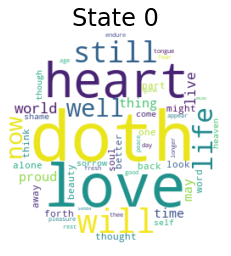

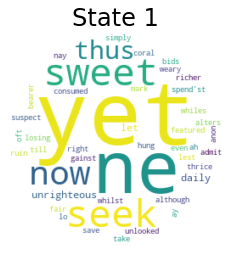

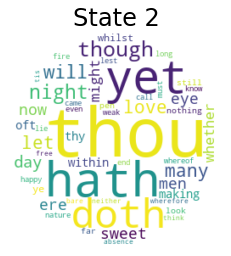

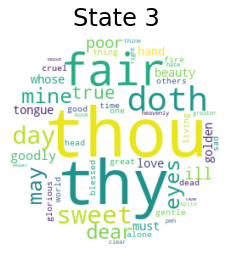

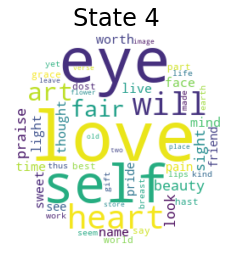

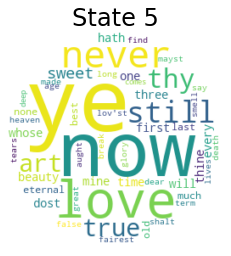

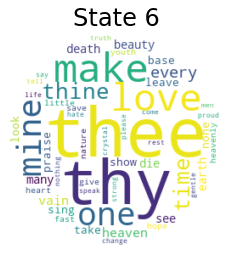

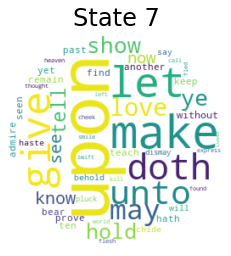

In [26]:
wordclouds = states_to_wordclouds(hmm8, obs_map)


Animating...


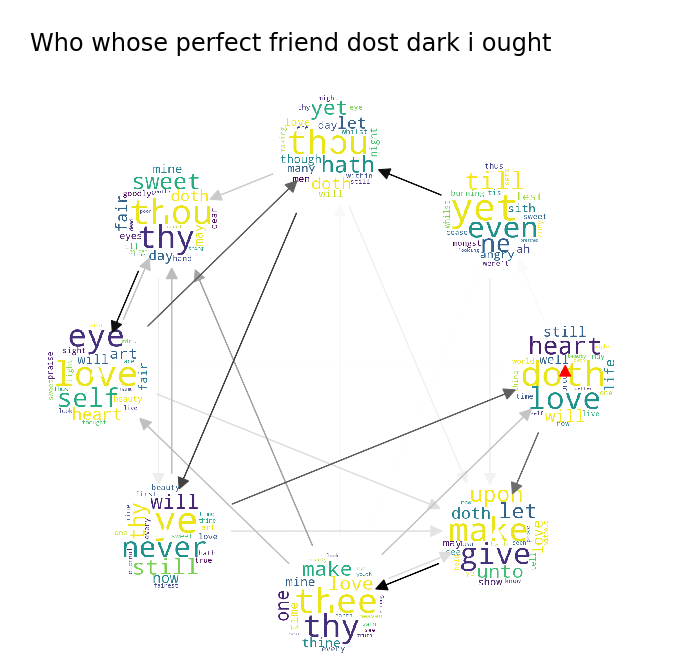

In [28]:
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())